In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0272EN-SkillsNetwork/labs/dataset/2016.csv"

In [2]:
import pandas as pd
df=pd.read_csv(URL)

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
df.shape

(157, 13)

In [6]:
#To remove whitespaces from all columns in the DataFrame:

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\43667\AppData\Local\Temp\ipykernel_7160\869802577.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [10]:
#replace empty strings across all columns
import numpy as np
df.replace('', np.nan, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      153 non-null    float64
 5   Upper Confidence Interval      154 non-null    object 
 6   Economy (GDP per Capita)       155 non-null    object 
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       154 non-null    object 
 9   Freedom                        156 non-null    object 
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [12]:


# Step 3: Convert columns to appropriate data types
for col in df.columns:
    # Try converting to numeric
    df[col] = pd.to_numeric(df[col], errors='ignore')
    
    # If not numeric, try converting to datetime
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col], errors='raise')
        except:
            # If fails, keep as string
            df[col] = df[col].astype('string')

# Optional: Check the cleaned DataFrame
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    string 
 1   Region                         157 non-null    string 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      153 non-null    float64
 5   Upper Confidence Interval      154 non-null    float64
 6   Economy (GDP per Capita)       155 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       154 non-null    float64
 9   Freedom                        156 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

C:\Users\43667\AppData\Local\Temp\ipykernel_7160\3151497367.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')
C:\Users\43667\AppData\Local\Temp\ipykernel_7160\3151497367.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')


In [13]:
#Identify the columns of a data frame with missing values.
missing_columns = df.columns[df.isna().any()].tolist()
print("Columns with missing values:", missing_columns)

Columns with missing values: ['Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']


In [14]:
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])

Lower Confidence Interval    4
Upper Confidence Interval    3
Economy (GDP per Capita)     2
Health (Life Expectancy)     3
Freedom                      1
dtype: int64


In [15]:
for col in missing_columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)

In [17]:
print(df.isna().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


Write a python code that identifies the GDP per capita and Healthy Life Expectancy of the top 10 countries and create a bar chart named fig1 to show the GDP per capita and Healthy Life Expectancy of these top 10 countries using plotly.

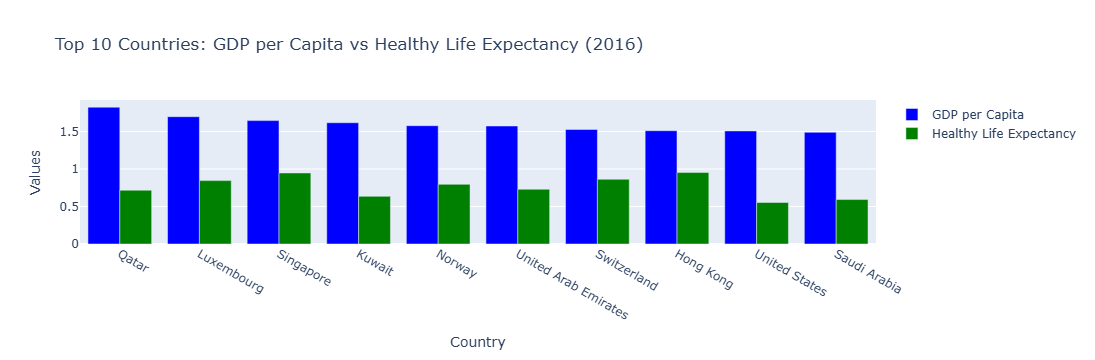

In [21]:
import plotly.graph_objects as go
# Ensure numeric columns are correct type
df['GDP per capita'] = pd.to_numeric(df['Economy (GDP per Capita)'], errors='coerce')
df['Healthy life expectancy'] = pd.to_numeric(df['Health (Life Expectancy)'], errors='coerce')

# Drop rows with missing GDP per capita or Healthy life expectancy
df_clean = df.dropna(subset=['GDP per capita', 'Healthy life expectancy'])

# Identify top 10 countries by GDP per capita
top10 = df_clean.sort_values(by='GDP per capita', ascending=False).head(10)

# Create a bar chart using Plotly
fig1 = go.Figure()

# GDP per capita bars
fig1.add_trace(go.Bar(
    x=top10['Country'],
    y=top10['GDP per capita'],
    name='GDP per Capita',
    marker_color='blue'
))

# Healthy Life Expectancy bars
fig1.add_trace(go.Bar(
    x=top10['Country'],
    y=top10['Healthy life expectancy'],
    name='Healthy Life Expectancy',
    marker_color='green'
))

# Update layout
fig1.update_layout(
    title='Top 10 Countries: GDP per Capita vs Healthy Life Expectancy (2016)',
    xaxis_title='Country',
    yaxis_title='Values',
    barmode='group'
)

# Show the figure
fig1.show()


Write a python code that performs the following actions:
  -  1. Create a sub-dataset including Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Happiness Score attributes from the dataframe (df).
  -  2. Find the correlation between the attributes in the subdataset as a heatmap named fig2 using Plotly of width 800 and height 600.

In [22]:
columns_to_select = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Happiness Score'
]

sub_df = df[columns_to_select]

# Optional: Display the first few rows of the sub-dataset
print(sub_df.head())

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Happiness Score  
0                        0.44453     0.36171            7.526  
1                        0.41203     0.28083            7.509  
2                        0.14975     0.47678            7.501  
3                        0.35776     0.37895            7.498  
4                        0.41004     0.25492            7.413  


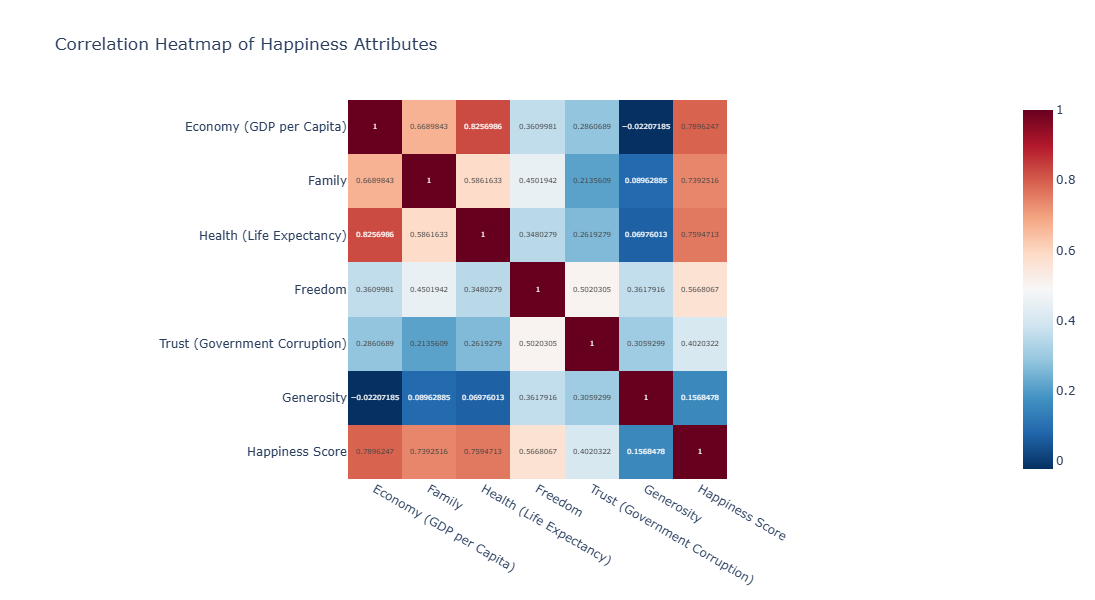

In [24]:
# Convert all columns to numeric (if not already)
import plotly.express as px
sub_df = sub_df.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = sub_df.corr()

# Create heatmap using Plotly
fig2 = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Heatmap of Happiness Attributes',
    width=800,
    height=600
)

# Show the heatmap
fig2.show()


Write a code that creates a scatter plot named fig3 between Happiness Score and GDP per Capita attributes of a dataframe using Plotly. Use Region to color the data points on the scatter plot.

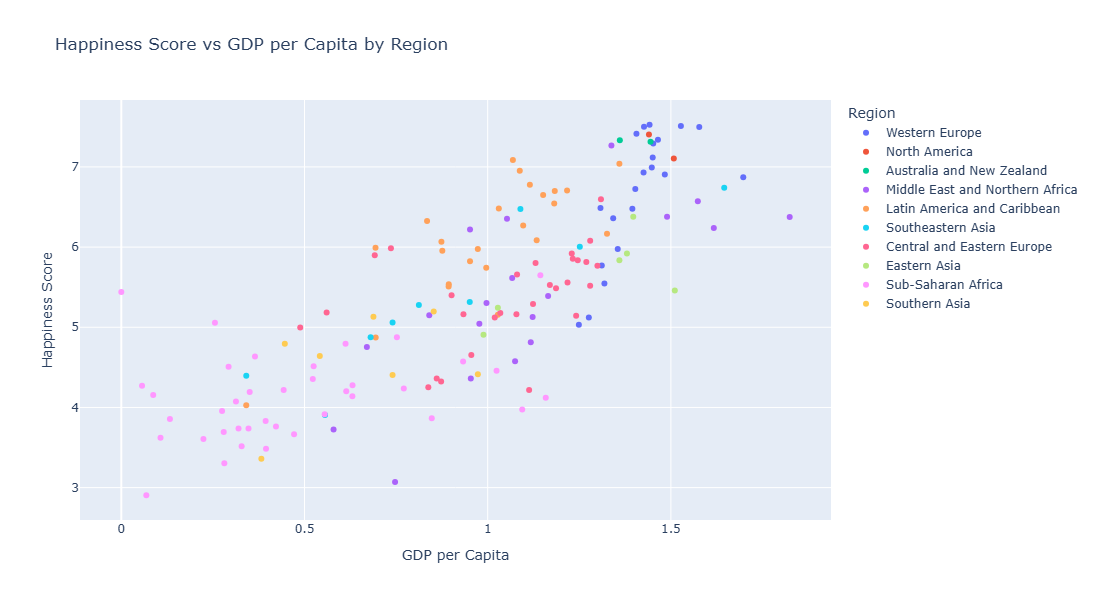

In [25]:
# Convert numeric columns to numeric types
df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')
df['Economy (GDP per Capita)'] = pd.to_numeric(df['Economy (GDP per Capita)'], errors='coerce')

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Happiness Score', 'Economy (GDP per Capita)', 'Region'])

# Create scatter plot using Plotly
fig3 = px.scatter(
    df_clean,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    color='Region',
    title='Happiness Score vs GDP per Capita by Region',
    labels={'Economy (GDP per Capita)': 'GDP per Capita', 'Happiness Score': 'Happiness Score'},
    width=800,
    height=600
)

# Show the figure
fig3.show()

Write a Plotly code that creates a pie chart named fig4 to present Happiness Score by Region attributes of dataframe df.

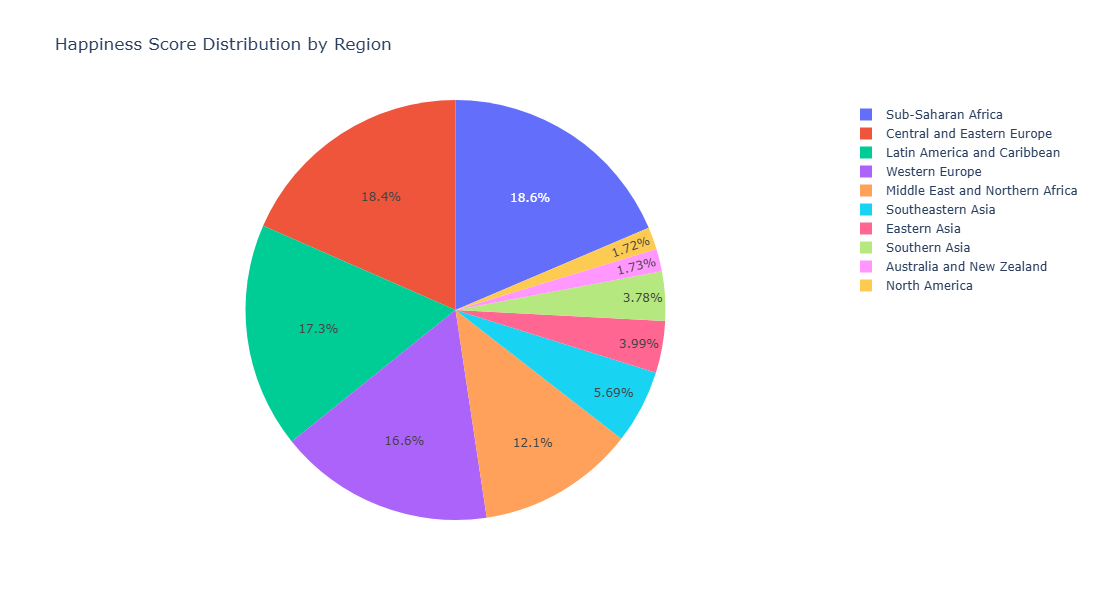

In [26]:
# Convert Happiness Score to numeric
df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')

# Group by Region and sum Happiness Score
region_happiness = df.groupby('Region', as_index=False)['Happiness Score'].sum()

# Create pie chart using Plotly
fig4 = px.pie(
    region_happiness,
    names='Region',
    values='Happiness Score',
    title='Happiness Score Distribution by Region',
    width=800,
    height=600
)

# Show the figure
fig4.show()

Write a Plotly code that creates a map named fig5 to display GDP per capita of countries and include Healthy Life Expectancy to be shown as a tooltip.

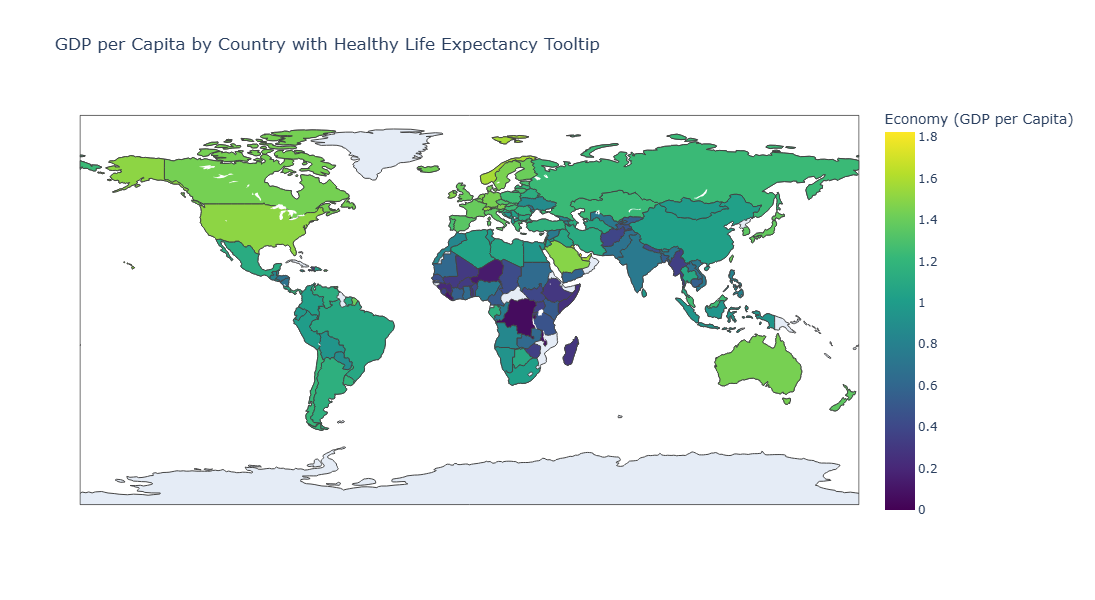

In [27]:
# Convert numeric columns to proper types
df['Economy (GDP per Capita)'] = pd.to_numeric(df['Economy (GDP per Capita)'], errors='coerce')
df['Health (Life Expectancy)'] = pd.to_numeric(df['Health (Life Expectancy)'], errors='coerce')

# Drop rows with missing GDP or Healthy Life Expectancy
df_clean = df.dropna(subset=['Economy (GDP per Capita)', 'Health (Life Expectancy)'])

# Create choropleth map using Plotly
fig5 = px.choropleth(
    df_clean,
    locations='Country',  # Country names
    locationmode='country names',
    color='Economy (GDP per Capita)',  # Color by GDP per capita
    hover_name='Country',  # Tooltip: country name
    hover_data={'Health (Life Expectancy)': True, 'Economy (GDP per Capita)': ':.2f'},  # Additional tooltip data
    color_continuous_scale='Viridis',
    title='GDP per Capita by Country with Healthy Life Expectancy Tooltip',
    width=1000,
    height=600
)

# Show the map
fig5.show()

Write Python code to write any four of the Plotly figures (fig1, fig2, fig3, fig4, fig5) to a single HTML file named “dashboard.html”?

In [33]:
import plotly.io as pio

# List of figures to include
figures = [fig1, fig2, fig3, fig4,fig5]

# Write multiple figures to a single HTML file
with open("dashboard.html", "w") as f:
    for fig in figures:
        # Convert each figure to HTML and append to the file
        f.write(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))


Generate a narrative to present the dashboard on world happiness report with the following charts:-
    1. A heatmap showing correlation
    2. A scatter plot to identify the effect of GDP per Capita on Happiness Score in various Regions
    3. A pie chart to present Happiness score by Regions
    4. A map to display `GDP per capita` of `countries` and include `Healthy Life Expectancy` to be shown as a tooltip

# World Happiness Report Dashboard Narrative
Welcome to the World Happiness Report Dashboard, which provides a visual analysis of global happiness scores and the key factors influencing them. This dashboard comprises four main visualizations that help us explore patterns, relationships, and regional differences in happiness.

## 1. Correlation Heatmap
The first chart is a heatmap that shows the correlation between various attributes contributing to happiness, such as GDP per Capita, Family, Healthy Life Expectancy, Freedom, Trust in Government, Generosity, and the overall Happiness Score.

The heatmap allows us to quickly identify strong positive or negative relationships among these factors.

For instance, we can observe how GDP per Capita and Healthy Life Expectancy are strongly correlated with higher Happiness Scores, while other factors like Generosity may have a smaller but notable effect.

This chart provides a foundation for understanding which attributes are key drivers of happiness globally.

## 2. Scatter Plot: GDP per Capita vs Happiness Score
The second chart is a scatter plot that examines the relationship between GDP per Capita and Happiness Score, with countries colored by Region.

This visualization helps us identify patterns and trends across different regions.

We can see that countries with higher GDP per Capita generally tend to have higher Happiness Scores, although there are exceptions influenced by other social and political factors.

Regional coloring allows us to compare economic influence on happiness across continents and groups of countries.

## 3. Pie Chart: Happiness Score by Region
The third visualization is a pie chart showing the distribution of Happiness Scores by Region.

This chart provides a clear proportional view of global happiness, highlighting which regions contribute the most to the overall happiness scores.

It also allows for a quick comparison between continents, showing regional disparities in happiness.

## 4. Choropleth Map: GDP per Capita with Healthy Life Expectancy Tooltip
The fourth visualization is a world map (choropleth) displaying GDP per Capita by country, with Healthy Life Expectancy shown as a tooltip.

This map offers a geographical perspective on economic prosperity and health across the globe.

Hovering over a country shows its GDP per Capita along with the Healthy Life Expectancy, helping us explore how wealth and health influence happiness geographically.

We can observe clusters of high GDP and life expectancy in regions like North America and Western Europe, while other regions show lower economic and health metrics.

# Conclusion
Together, these visualizations provide a comprehensive view of global happiness patterns.

The heatmap identifies the key factors affecting happiness.

The scatter plot highlights the economic influence and regional differences.

The pie chart offers an overview of happiness contributions by region.

The map connects economic and health indicators with geographical locations.

This dashboard serves as an insightful tool for policymakers, researchers, and anyone interested in understanding the complex factors that contribute to human happiness worldwide.

